<a href="https://colab.research.google.com/github/JRafaQuadros91/RandomForest1/blob/main/RFViolenciaMulher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

  Este trabalho consiste em realizar uma análise sobre dados de ocorrências registradas no primeiro semestre do ano de 2020, no estado do PR, as quais tiveram ligação com a Violência Doméstica e Familiar Contra a Mulher, levando em consideração a faixa de renda do suspeito, grau de instrução do suspeito, idade do suspeito e sexo do suspeito, afim de realizar predição e trazer como resultados a acurácia e matriz de confusão dos dados.
     Sendo os dados captados de maneira correta, a realização dessa análise poderia, de certa forma, transmitir informações para a sociedade e contribuir para estudos e encontro de possibilidades e atividades que envolvam homens, com o intuito de educá-los.

# Objetivos

Analisar e realizar predição de acordo com os dados de ocorrências realizadas através do Disque 100, envolvendo Violência Doméstica e Familiar Contra a Mulher.

# Materiais e métodos

Para a realização do trabalho foi utilizado a ferramenta Google Colab, importando a base dados disponibilizados pelo Ministério da Mulher, da Família e dos Direitos Humanos, com foco na Violência Doméstica e Familiar Contra a Mulher.

  Em seu desenvolvimento, foi utilizado a linguagem de programação  Python e as bibliotecas Pandas e Matplotlib.

# Desenvolvimento

In [ ]:
#Bibliotecas

%%bash
#Instalação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/drive') #monta a base no google drive

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
!ls '/drive/MyDrive/IFPR/'

'1º Ano'			 AulaPassandoDadosEntreActivity   RecyclerView
'2º Ano'			 CalendarioTADS.pdf		  Snackbar
 AulaActivity			 HorarioTADS.pdf		  TCC.docx
 AulaActivityANDROIDSTUDIO.txt	'Modelo Apresentação TCC.pptx'
 AulaNavegationDrawer		 primeiro_semestre_2020.csv


In [ ]:
 #caminho da base de dados
database_path = '/drive/MyDrive/IFPR/primeiro_semestre_2020.csv'

#Carrega a base
df = pd.read_csv(database_path, sep=';', encoding='latin-1')

In [ ]:
df.head()

,Ano,Trimestre,Mês,Dia,Tipo_de_violação,Grupo_vulnerável,Espécie_de_violação,País_de_orígem_da_vítima,UF,Canal_de_atendimento,Denúncia_Emergencial,Denunciante,Motivação,Cenário_da_violação,Agravantes,agravantes_policiais,Relação_Vítima_x_Suspeito,Sexo_da_vítima,idade_vitima,Grau_instrução_da_vítima,Raça\cor_da_vítima,Faixa_de_renda_da_vítima,Nacionalidade_da_vítima,deficiencia_vitima,relacao_demandante_vitima,Sexo_do_suspeito,idade_suspeito,Grau_instrução_do_suspeito,Nacionalidade_do_suspeito,Raça\cor_do_suspeito,Faixa_de_renda_do_suspeito,País_de_orígem_do_suspeito,deficiencia_suspeito
0,2020,Trim 1,janeiro,1,2. VIOLÊNCIA PSICOLÓGICA,1-Violência Contra a Mulher,TORTURA PSÍQUICA,BRASIL,AL,DENÚNCIA - ATENDIMENTO TELEFÔNICO,NÃO,O PRÓPRIO AGRESSOR,N/D,VIA PÚBLICA,EM PÚBLICO - OUTRAS PESSOAS PRESENCIAM AS AGRE...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,MASCULINO,37 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,BRASILEIRO(A),PARDA,ATÉ 1 SALÁRIO MÍNIMO,BRASIL,NÃO
1,2020,Trim 1,janeiro,1,2. VIOLÊNCIA PSICOLÓGICA,1-Violência Contra a Mulher,AMEAÇA/COAÇÃO,BRASIL,AL,DENÚNCIA - ATENDIMENTO TELEFÔNICO,NÃO,O PRÓPRIO AGRESSOR,EM RAZÃO DO SEXO BIOLÓGICO,VIA PÚBLICA,RESULTADO DAS AGRESSÕES SE PROLONGAM AO LONGO ...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,MASCULINO,37 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,BRASILEIRO(A),PARDA,ATÉ 1 SALÁRIO MÍNIMO,BRASIL,NÃO
2,2020,Trim 1,janeiro,1,7. VIOLAÇÕES GERAIS,1-Violência Contra a Mulher,LIBERDADE SEXUAL PSÍQUICA - ABUSO SEXUAL PSÍQUICO,BRASIL,AL,DENÚNCIA - ATENDIMENTO TELEFÔNICO,NÃO,O PRÓPRIO AGRESSOR,EM RAZÃO DO SEXO BIOLÓGICO,VIA PÚBLICA,RESULTADO DAS AGRESSÕES SE PROLONGAM AO LONGO ...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,MASCULINO,37 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,BRASILEIRO(A),PARDA,ATÉ 1 SALÁRIO MÍNIMO,BRASIL,NÃO
3,2020,Trim 1,janeiro,1,2. VIOLÊNCIA PSICOLÓGICA,1-Violência Contra a Mulher,TORTURA PSÍQUICA,BRASIL,AL,DENÚNCIA - ATENDIMENTO TELEFÔNICO,NÃO,O PRÓPRIO AGRESSOR,N/D,VIA PÚBLICA,EM PÚBLICO - OUTRAS PESSOAS PRESENCIAM AS AGRE...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,MASCULINO,37 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,BRASILEIRO(A),PARDA,ATÉ 1 SALÁRIO MÍNIMO,BRASIL,NÃO
4,2020,Trim 1,janeiro,1,2. VIOLÊNCIA PSICOLÓGICA,1-Violência Contra a Mulher,AMEAÇA/COAÇÃO,BRASIL,AL,DENÚNCIA - ATENDIMENTO TELEFÔNICO,NÃO,O PRÓPRIO AGRESSOR,EM RAZÃO DO SEXO BIOLÓGICO,VIA PÚBLICA,RESULTADO DAS AGRESSÕES SE PROLONGAM AO LONGO ...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,MASCULINO,37 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,BRASILEIRO(A),PARDA,ATÉ 1 SALÁRIO MÍNIMO,BRASIL,NÃO


In [ ]:
df.shape #Mostra o número de linhas e colunas na base

(1016398, 33)

In [ ]:
#Listagem da quantidade de registros de violência por estado
vl = df["UF"].value_counts()
vl.head(27)

SP    233753
RJ    158734
MG    116828
BA     51152
RS     49766
PR     37587
CE     37092
PE     34890
SC     32095
GO     30509
MA     24928
DF     24282
PA     23894
RN     21321
AM     20573
ES     19242
PB     18582
MS     16511
PI     14432
AL     12283
MT      9695
SE      8965
RO      6002
TO      5163
AP      2519
AC      2489
RR      1873
Name: UF, dtype: int64

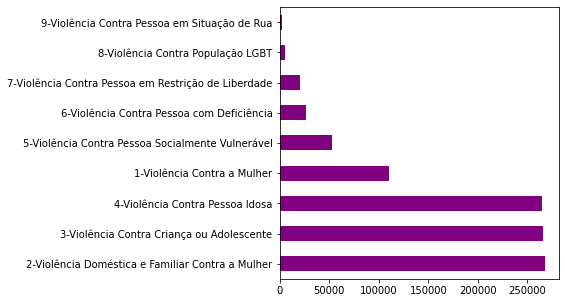

In [ ]:
v2 = df["Grupo_vulnerável"]
v2a = v2.value_counts()
v2a.head()  ## A maioria das ocorrências envolvem Violência Doméstica e Familiar Contra a Mulher

v2a.plot(kind="barh",stacked=True,figsize=(5,5),color='purple')
plt.show()

2-Violência Doméstica e Familiar Contra a Mulher

In [ ]:
df1 = df[df['UF']== 'PR']
df1.value_counts()
df1.info

<bound method DataFrame.info of          Ano Trimestre  ... País_de_orígem_do_suspeito  deficiencia_suspeito
461139  2020    Trim 1  ...                     BRASIL                   N/D
461140  2020    Trim 1  ...                     BRASIL                   N/D
461141  2020    Trim 1  ...                     BRASIL                   N/D
461142  2020    Trim 1  ...                     BRASIL                   N/D
461143  2020    Trim 1  ...                     BRASIL                   N/D
...      ...       ...  ...                        ...                   ...
498721  2020    Trim 2  ...                        N/D                   N/D
498722  2020    Trim 2  ...                        N/D                   N/D
498723  2020    Trim 2  ...                        N/D                   N/D
498724  2020    Trim 2  ...                        N/D                   N/D
498725  2020    Trim 2  ...                        N/D                   N/D

[37587 rows x 33 columns]>

In [ ]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import glob

In [ ]:
##Implementando Arvore de Decisão !

from sklearn import tree



# Variáveis
alvo = df1['Grupo_vulnerável'] == '2-Violência Doméstica e Familiar Contra a Mulher' #variável alvo


# #Variaveis Dummy
baseFiltroquali = ['Faixa_de_renda_do_suspeito', 'Grau_instrução_do_suspeito','idade_suspeito','Sexo_do_suspeito','Agravantes'] #Variáveis qualitativas
# baseFiltroquali.astype("string")
dfquali = pd.get_dummies(df1[baseFiltroquali])
dfquali.info()

alvo.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37587 entries, 461139 to 498725
Columns: 670 entries, Faixa_de_renda_do_suspeito_"35 E 37 to Agravantes_VÍTIMA PRESA EM INSTITUIÇÃO PÚBLICA
dtypes: uint8(670)
memory usage: 24.3 MB


461139    True
461140    True
461141    True
461142    True
461143    True
Name: Grupo_vulnerável, dtype: bool

In [ ]:
alvo.head()

461139    True
461140    True
461141    True
461142    True
461143    True
Name: Grupo_vulnerável, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

dfquali_train, dfquali_test, alvo_train, alvo_test = train_test_split(dfquali, alvo, train_size=0.7, random_state=42)

print('O dataset de treino possui {} entradas e o de teste {} entradas.'.format(dfquali_train.shape[0], dfquali_test.shape[0]))

O dataset de treino possui 26310 entradas e o de teste 11277 entradas.


In [ ]:
#importando Random Forest e aplicando o metodo FIT para aplicar o algoritmo
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(dfquali_train, alvo_train)

RandomForestClassifier()

In [ ]:
#variaveis que mais importam na hora de tomar uma decisão
for feature,importancia in zip(dfquali.columns,rfc.feature_importances_): # listando as importancias das variaveis nos resultados da Random Forest
    print("{}:{} %".format(feature, (importancia)*100))

Faixa_de_renda_do_suspeito_"35 E 37:0.0 %
Faixa_de_renda_do_suspeito_1 A 3 SALÁRIOS MÍNIMOS:0.7303709855565138 %
Faixa_de_renda_do_suspeito_18 ANOS:0.0008850497345158016 %
Faixa_de_renda_do_suspeito_20:0.00018128847415473332 %
Faixa_de_renda_do_suspeito_22:9.582031325981932e-05 %
Faixa_de_renda_do_suspeito_22 anos:0.0021858047127808105 %
Faixa_de_renda_do_suspeito_24:0.00032215977069567403 %
Faixa_de_renda_do_suspeito_24 ANOS:0.0 %
Faixa_de_renda_do_suspeito_25:0.0033624769558021125 %
Faixa_de_renda_do_suspeito_26 ANOS":0.005518588265319853 %
Faixa_de_renda_do_suspeito_26 anos:0.005068080861640114 %
Faixa_de_renda_do_suspeito_28 A 29 ANOS:0.00038906237328979867 %
Faixa_de_renda_do_suspeito_29:7.598323070767853e-05 %
Faixa_de_renda_do_suspeito_29 e 30 - 32 ANOS:9.715245309687783e-05 %
Faixa_de_renda_do_suspeito_3 A 5 SALÁRIOS MÍNIMOS:0.4360999894579082 %
Faixa_de_renda_do_suspeito_30:5.368005057583441e-05 %
Faixa_de_renda_do_suspeito_30 ANOS:0.0020302021454187643 %
Faixa_de_renda_do_sus

In [ ]:
df['Faixa_de_renda_do_suspeito'].value_counts()

N/D                                              743600
BRASILEIRO(A)                                    133278
ATÉ 1 SALÁRIO MÍNIMO                              32674
1 A 3 SALÁRIOS MÍNIMOS                            29531
ENSINO FUNDAMENTAL INCOMPLETO                     14891
                                                  ...  
APARENTA TER APROXIMADAMENTE 20 ANOS DE IDADE         1
75 ANOS"                                              1
APROXIMADAMENTE 24 ANOS                               1
43 ANOS                                               1
APARENTA TER 35 ANOS DE IDADE                         1
Name: Faixa_de_renda_do_suspeito, Length: 426, dtype: int64

In [ ]:
alvo_pred=rfc.predict(dfquali_test) # Predicao dos valores

In [ ]:
alvo_pred #listando valores preditos

array([False, False, False, ..., False, False, False])

# Resultados e discussões

In [ ]:
# Importando metrics e printando estimadores de resultados
from sklearn import metrics
print(metrics.classification_report(alvo_test,alvo_pred))

              precision    recall  f1-score   support

       False       0.89      0.91      0.90      8592
        True       0.69      0.64      0.66      2685

    accuracy                           0.84     11277
   macro avg       0.79      0.77      0.78     11277
weighted avg       0.84      0.84      0.84     11277



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix , f1_score , precision_score


print("A acurácia foi de {:.2f}%.".format(accuracy_score(alvo_test,alvo_pred)*100))

print ("Matriz de confusão : ")
print(confusion_matrix(alvo_test,alvo_pred))

A acurácia foi de 84.46%.
Matriz de confusão : 
[[7818  774]
 [ 979 1706]]


In [ ]:
CM = confusion_matrix(alvo_test,alvo_pred) # Matriz de confusao

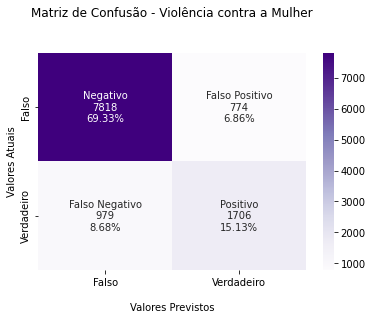

In [ ]:
#Plotando matriz de confusao

import seaborn as sns 

group_names = ['Negativo','Falso Positivo','Falso Negativo','Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                CM.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     CM.flatten()/np.sum(CM)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(CM, annot=labels, fmt='', cmap='Purples')

ax.set_title('Matriz de Confusão - Violência contra a Mulher\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['Falso','Verdadeiro'])
ax.yaxis.set_ticklabels(['Falso','Verdadeiro'])

plt.show()

# Conclusão

Infelizmente, devido a base de dados não estar devidamente preenchida, impossibilitou que o resultado ocorresse de maneira precisa. Ainda assim, com os dados atuais disponibilizados, apresentou resultados consideráveis, mostrando que há a possibilidade de comparação entre a violência contra a mulher, as características do suspeitos e agravantes da violência.

# Referências

*Incluir aqui as referências bibliográficas. Utilizar links para os materiais e utilizar as normas para referências da ABNT.*

[*CONE, M. Markdown Cheat Sheet: A quick reference to the Markdown syntax. Markdownguide.org, 2020.*](https://www.markdownguide.org/cheat-sheet/#downloads)  
[*FREELA, D. Markdown – Um guia para iniciantes. Produtive.me, 2019.*](https://produtive.me/guia/markdown-um-guia-para-iniciantes/)  

[*MDH, Primeiro Semestre 2020. Disque 100, 2019.*](https://produtive.me/guia/markdown-um-guia-para-iniciantes/) 
